In [1]:
# pip install -U ruletree

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from IPython.display import IFrame, JSON
from RuleTree import RuleTreeClassifier
from RuleTree.encoding.ruletree_to_jakowski_tree_encoder import ruletree_to_jakowski, jakowski_to_ruletree

In [4]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

X = iris_df.drop('target', axis=1).values
y = iris_df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
rt = RuleTreeClassifier(max_depth=8, prune_useless_leaves=False, random_state=0)
rt.fit(X_train, y_train)
#rt.root.simplify()

print(classification_report(y_pred=rt.predict(X_test), y_true=y_test))

y_pred_before_encoding = rt.predict(X_test)
y_pred_proba_before_encoding = rt.predict_proba(X_test)

rt.export_graphviz(filename="demo")#, columns_names=iris_df.columns[:-1])
IFrame("demo.pdf", width=600, height=300)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [6]:
json = rt.to_dict(filename="demo.json")

/Users/francesco/github/RuleTree-dev/RuleTree/tree/RuleTree.py:637: UserWarning: As for now base_stump is not serializable
  warnings.warn("As for now base_stump is not serializable")


In [7]:
enc = ruletree_to_jakowski(json)

[4.0,	4.0,	3.0,	4.0,	4.0,	4.0,	4.0,	4.0,	4.0,	4.0,	4.0,	4.0,	2.0,	4.0,	4.0,	-1.0,	-1.0,	-1.0,	-1.0,	-1.0,	-1.0,	-1.0,	-1.0,	-1.0,	-1.0,	-1.0,	-1.0,	-1.0,	-1.0,	-1.0,	-1.0,	]
[0.75,	0.75,	4.95,	0.75,	0.75,	1.65,	1.75,	0.75,	0.75,	0.75,	0.75,	1.65,	3.1,	1.65,	1.75,	 1.0,	 1.0,	 1.0,	 1.0,	 1.0,	 1.0,	 1.0,	 1.0,	 2.0,	 2.0,	 3.0,	 2.0,	 3.0,	 2.0,	 3.0,	 3.0,	]


In [8]:
rt_2 = RuleTreeClassifier.from_dict(jakowski_to_ruletree(enc))
rt_2.classes_ = rt.classes_

RuleTree.stumps.classification.DecisionTreeStumpClassifier
RuleTree.stumps.classification.DecisionTreeStumpClassifier
RuleTree.stumps.classification.DecisionTreeStumpClassifier
RuleTree.stumps.classification.DecisionTreeStumpClassifier
RuleTree.stumps.classification.DecisionTreeStumpClassifier
RuleTree.stumps.classification.DecisionTreeStumpClassifier
RuleTree.stumps.classification.DecisionTreeStumpClassifier
RuleTree.stumps.classification.DecisionTreeStumpClassifier
RuleTree.stumps.classification.DecisionTreeStumpClassifier
RuleTree.stumps.classification.DecisionTreeStumpClassifier
RuleTree.stumps.classification.DecisionTreeStumpClassifier
RuleTree.stumps.classification.DecisionTreeStumpClassifier
RuleTree.stumps.classification.DecisionTreeStumpClassifier
RuleTree.stumps.classification.DecisionTreeStumpClassifier
RuleTree.stumps.classification.DecisionTreeStumpClassifier


In [9]:
rt_2.export_graphviz(filename="demo")
IFrame("demo.pdf", width=600, height=300)

In [10]:
# rt_2.root = rt_2.root.simplify()

In [11]:
rt_2.export_graphviz(filename="demo")
IFrame("demo.pdf", width=600, height=300)

In [12]:
print(classification_report(y_pred=rt_2.predict(X_test), y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [13]:
y_pred_after_encoding = rt_2.predict(X_test)
y_pred_proba_after_encoding = rt_2.predict_proba(X_test)

In [14]:
np.allclose(y_pred_before_encoding, y_pred_after_encoding), np.allclose(y_pred_proba_before_encoding, y_pred_proba_after_encoding)

(True, False)

In [15]:
y_pred_proba_before_encoding

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [16]:
from RuleTree.encoding.sklearn_to_jakowski_tree_encoder import JakowskiEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [20]:
encoder = JakowskiEncoder(n_features=X.shape[1], n_classes=np.unique(y).shape[0])
clf = encoder.decode(enc, prune=False)

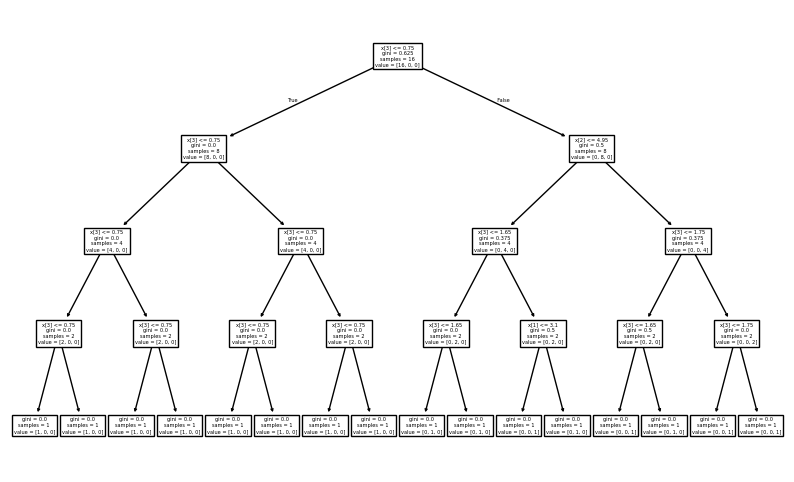

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_tree(clf, ax=ax)
plt.show()

In [19]:
# enc = encoder.encode(clf, depth=8)